# Simple Recurrent Neural Network in Tensorflow.

In [14]:
import tensorflow as tf
import numpy as np
from pprint import pprint

dt = 0.05
num_inputs = 3
num_outputs = 1
num_nodes = 100
num_epochs = 1000
initial_state = np.random.randn(num_nodes,1) #tf.zeros([num_nodes,1],dtype=tf.float32)

# Set parameters
# np.random.seed(22)
set_weights = np.random.randn(num_nodes+num_outputs,num_nodes)*0.1
# pprint(set_weights)
# set_weights = np.array([[1.1,  -1],
#                         [ -1, 1.1],
#                         [  0,   1]],dtype=np.float32)

set_bias = np.zeros([num_nodes+num_outputs,1],dtype=np.float32)

# Define nodes and variables
_input = tf.placeholder(tf.float32,[num_inputs,1])  # Dim 1 = 1 as this is a dynamic task that only takes one input at a time
_input_buffer = tf.zeros([num_nodes-num_inputs,1],dtype=tf.float32)

I = tf.concat([_input,_input_buffer],0)

W = tf.Variable(set_weights, dtype=tf.float32) # could be a constant...
b = tf.Variable(set_bias, dtype=tf.float32)

state = tf.Variable(initial_state,dtype=tf.float32)


# Make model
Wx = tf.matmul(W,state)
Wx_b = Wx+b
recurrence, output = tf.split(Wx_b,[num_nodes,num_outputs],0)

output = tf.tanh(output) * 2

next_state = state + dt * (-state+tf.tanh(recurrence + I))

update_state = state.assign(next_state)


with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
#     print(I.eval(session=sess))
    
    
    out_list = list()
#     _in = np.random.randn(num_inputs,1)
    _in = np.zeros([num_inputs,1],dtype=np.float32)
    for epoch in range(num_epochs):
        _, out = sess.run([update_state, output],feed_dict={_input:_in})
        out_list.append(out)

# pprint(out_list)

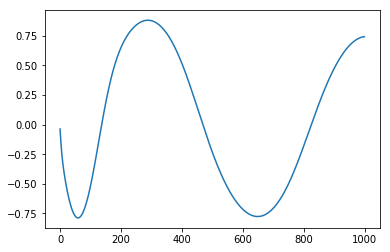

In [15]:
import matplotlib.pyplot as plt

x = [_[0][0] for _ in out_list]

plt.plot(x)
plt.show()

In [42]:
np.random.randn(1,1,3)

array([[[-0.09756346, -0.88652934, -0.13671324]]])

In [8]:
print(set_weights.shape)

(101, 100)


In [12]:
np.random.randn(2)*0.1

array([ 0.12191729,  0.10544571])